
# Insights into Telecom Churn: Predictive Modeling and Analysis with Python and Machine Learning



## Dataset Overview:

This dataset provides insights into Telecommunications Company (Telco) customer behavior, specifically focusing on customer churn within the last month.

### Description:

The dataset encompasses Telco customer data, offering a glimpse into the factors influencing customer attrition.


In [86]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data file**

In [87]:
telco_base_data = pd.read_csv("C:/Users/USER/OneDrive - students.sau.ac.in/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")


Look at the top 5 records of data


In [88]:
telco_base_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Attributes Overview

### Summary
Explore the key attributes of the dataset to gain insights into its structure and characteristics.

### Overview
- **Shape**: The dataset contains [rows] rows and [cols] columns.
- **Columns**: Examine the list of columns available in the dataset.
- **Data Types**: Analyze the data types associated with each column for better understanding.

#### Shape
```python
# Shape of the dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])



In [89]:
telco_base_data.shape


(7043, 21)

In [90]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [91]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [92]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



### Insights from Data Analysis

1. **SeniorCitizen** is a categorical variable; therefore, the distribution percentages of 25%, 50%, and 75% are not applicable.

2. A significant portion, approximately **75%** of customers, have a tenure of less than **55 months**.

3. The average monthly charges stand at **USD 64.76**, indicating a typical expenditure. However, it's noteworthy that **25%** of customers pay more than **USD 89.85** per month.

   



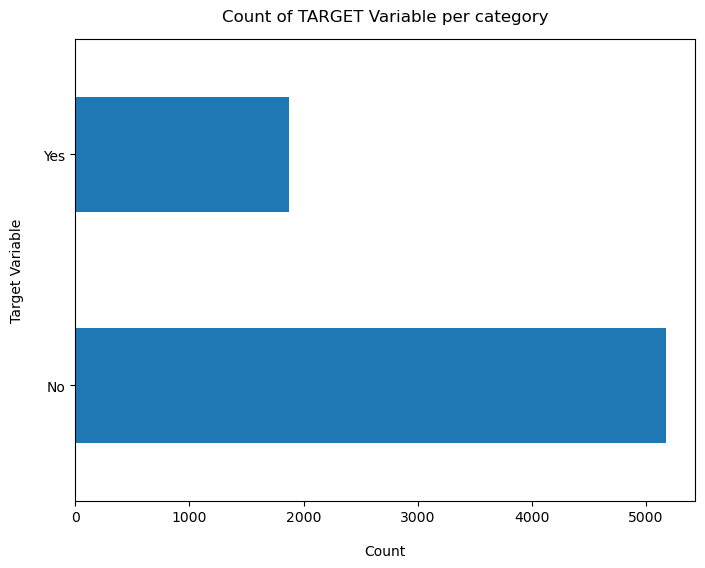

In [93]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);


In [94]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [95]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64




- Data Imbalance: Ratio - 73:27 (highly imbalanced)
- Analysis Approach: Considering other features separately with target values to gain insights.




In [96]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


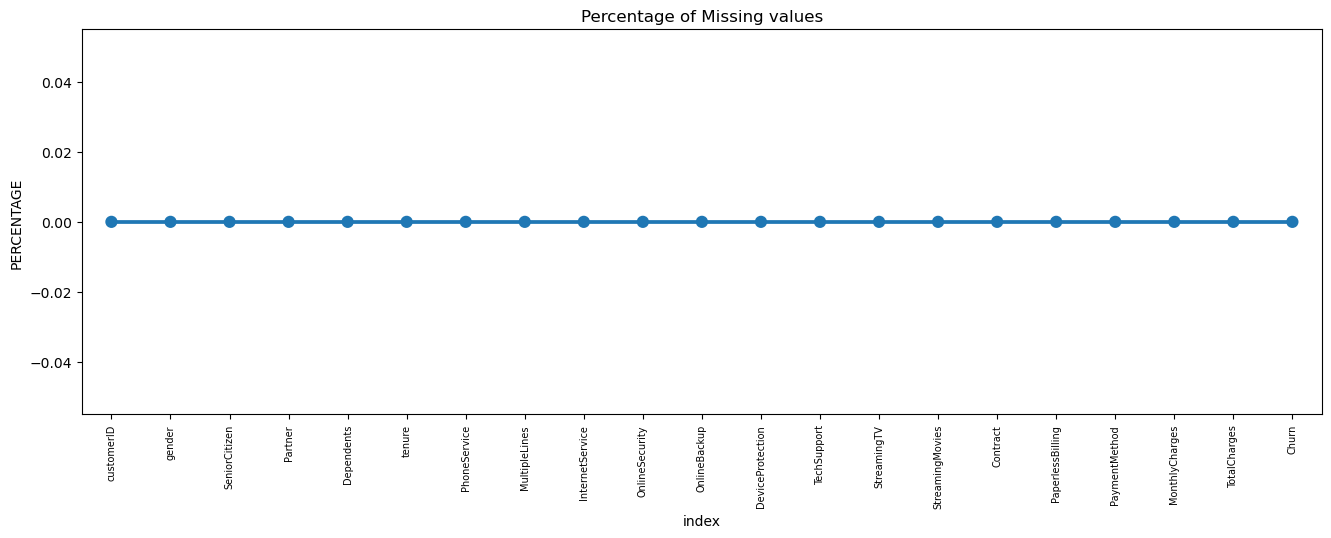

In [97]:
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16, 5))

# Specify x and y variables for pointplot
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning
**1.** Create a copy of base data for manupulation & processing\
**2.** Total Charges should be numeric amount. Let's convert it to numerical data type


In [98]:
telco_data = telco_base_data.copy()

In [99]:
# Convert the 'TotalCharges' column to numeric data type, coercing errors to NaN
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')  # Coerce errors to NaN

# Check for missing values in the DataFrame and sum them up column-wise
telco_data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records


In [100]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**


Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.


In [101]:
# Removing missing values
# This line of code removes rows containing any missing values from the DataFrame 'telco_data'.
# The parameter 'how' is set to 'any', meaning that if any value is missing in a row, that row will be removed.
# The parameter 'inplace' is set to 'True', which means the changes will be applied to the DataFrame 'telco_data' itself,
# and it will not return a new DataFrame.
telco_data.dropna(how='any', inplace=True)

# Filling missing values with 0
# This line of code replaces missing values in the DataFrame 'telco_data' with the value 0.
# Any NaN (Not a Number) values in the DataFrame will be replaced with 0.
# This method is used to handle missing values by replacing them with a specified value.
# However, it's important to consider whether replacing missing values with 0 is appropriate for your dataset
# and whether it may introduce bias or affect the analysis.
# This line is currently commented out using '#', so it will not be executed.
# If you want to execute this line, remove the '#' at the beginning of the line.
# Example: telco_data.fillna(0)


**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...


In [102]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [103]:
# Group the tenure (number of months a customer has stayed with the company) into bins of 12 months each.
# We create labels for these bins to represent the range of tenures, such as '1 - 12', '13 - 24', etc.
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

# Use the `cut` function from the Pandas library to categorize the tenure values into these bins.
# We specify the tenure column to be categorized, the range of values to create bins (1 to 79 with a step of 12),
# specify `right=False` to include the left side of each bin but exclude the right side, and provide the labels
# we created earlier to represent each bin.
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)


In [104]:
# This line of code is selecting the 'tenure_group' column from the telco_data DataFrame
# and then using the value_counts() function to count the occurrences of each unique value in the 'tenure_group' column.
telco_data['tenure_group'].value_counts()



tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**6.** Remove columns not required for processing


In [105]:
# Drop the 'customerID' and 'tenure' columns from the DataFrame 'telco_data'
# The 'columns' parameter specifies the list of columns to be dropped, which includes 'customerID' and 'tenure'
# The 'axis' parameter specifies that columns are to be dropped (axis=1) rather than rows
# The 'inplace=True' parameter ensures that the changes are made directly to the DataFrame 'telco_data' rather than creating a new DataFrame
telco_data.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame to verify the changes
telco_data.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [106]:
print(telco_data['Churn'].unique())


['No' 'Yes']


In [107]:
print(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).head())


   gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling

## Data Exploration
**1.** Plot distibution of individual predictors by churn

### Univariate Analysis


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


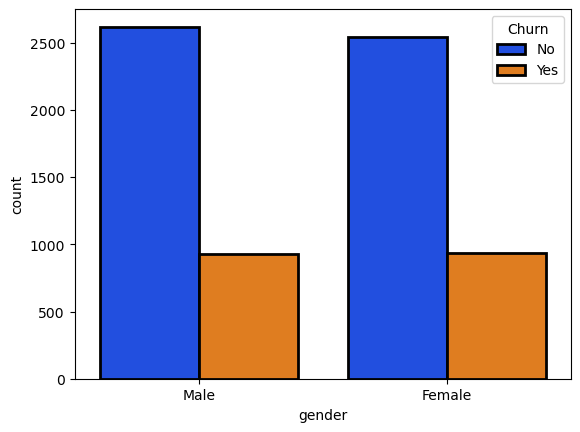

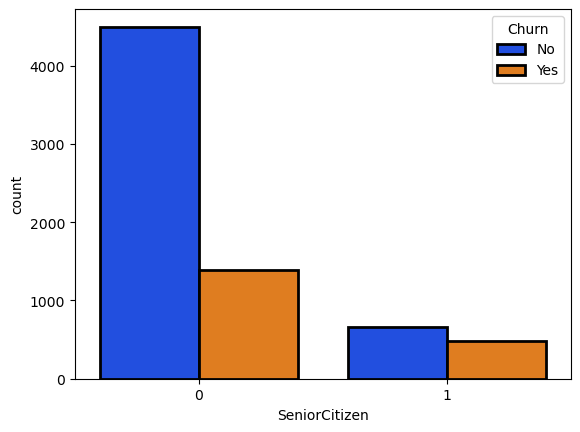

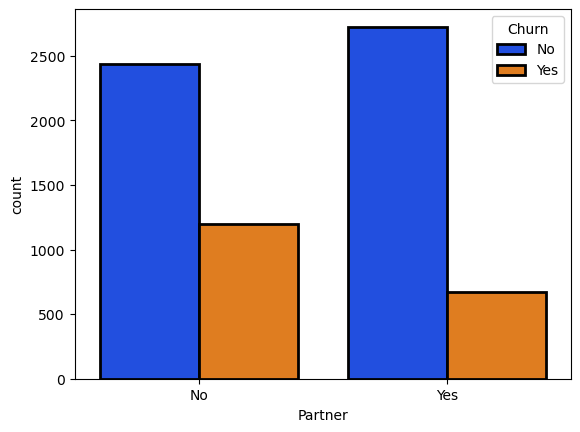

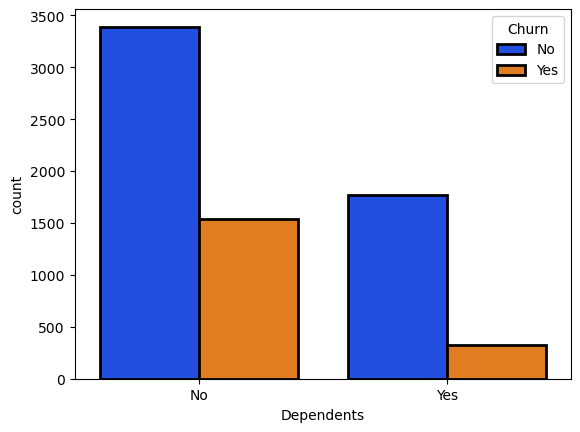

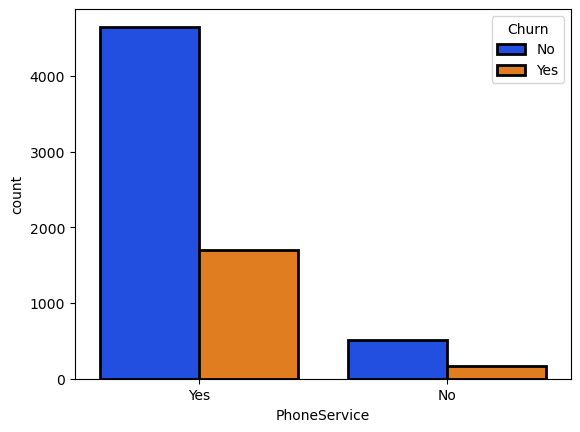

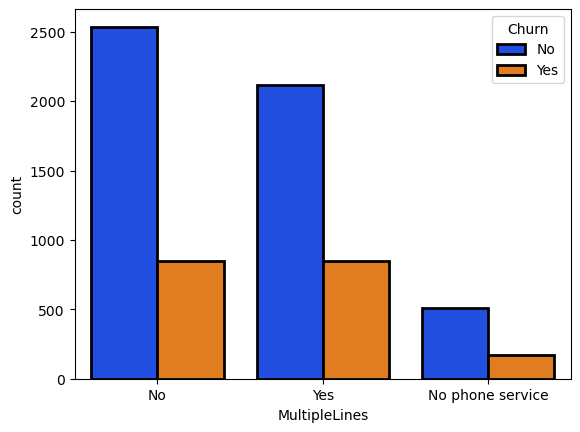

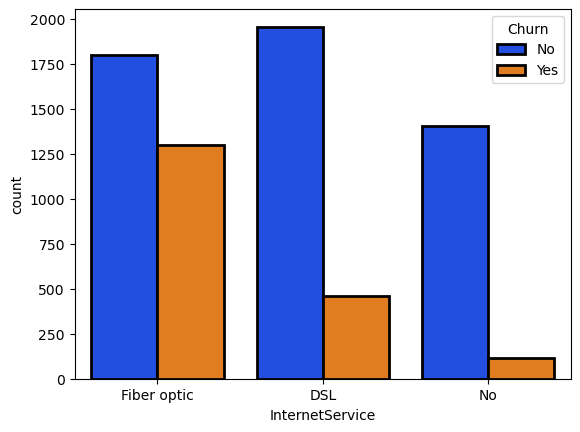

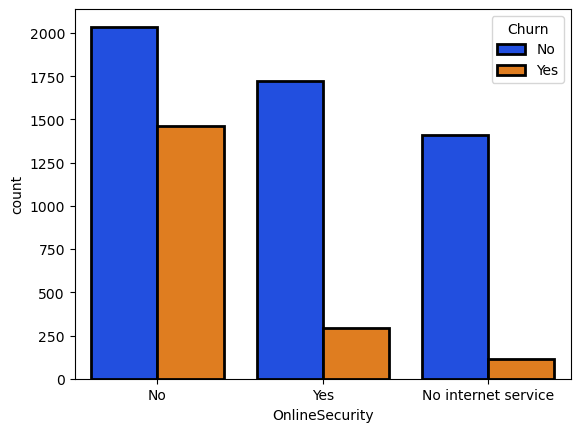

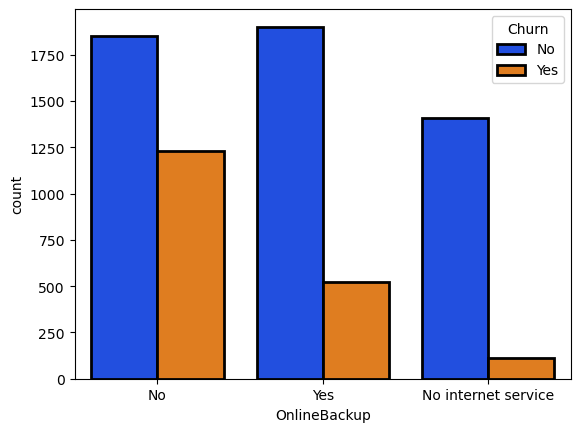

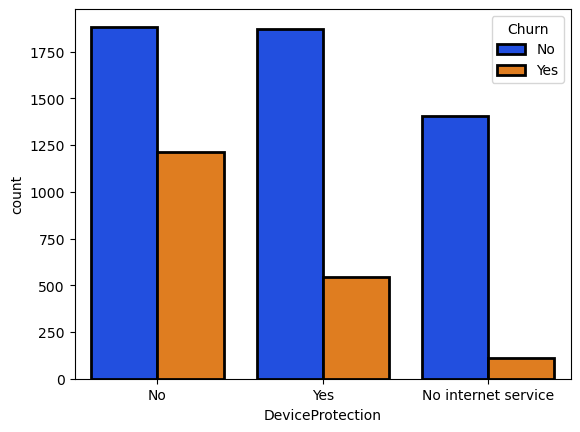

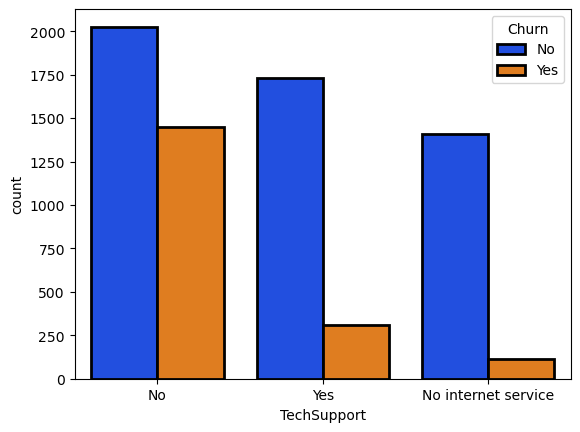

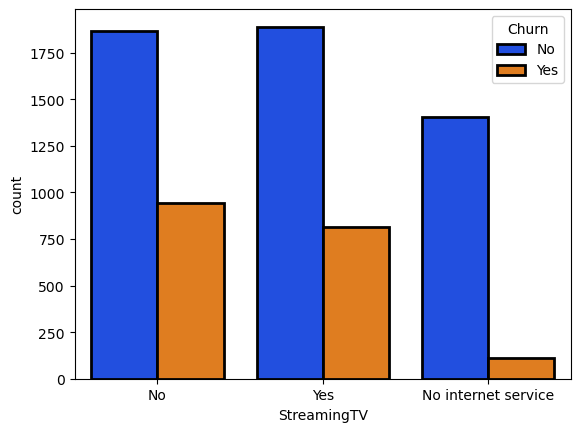

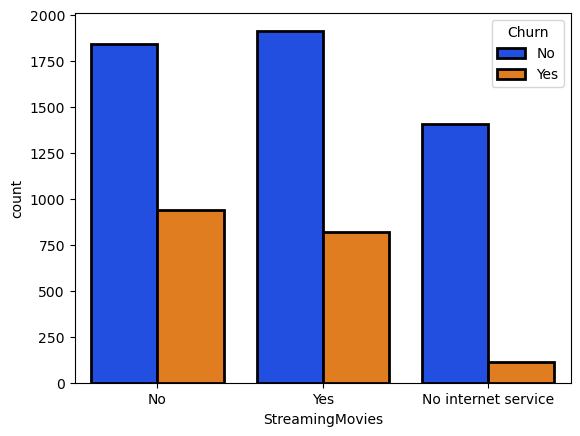

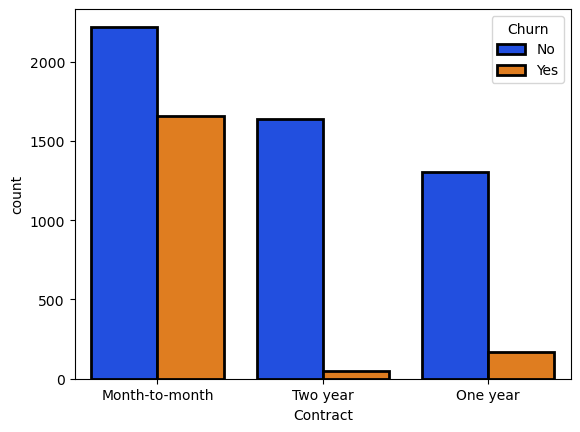

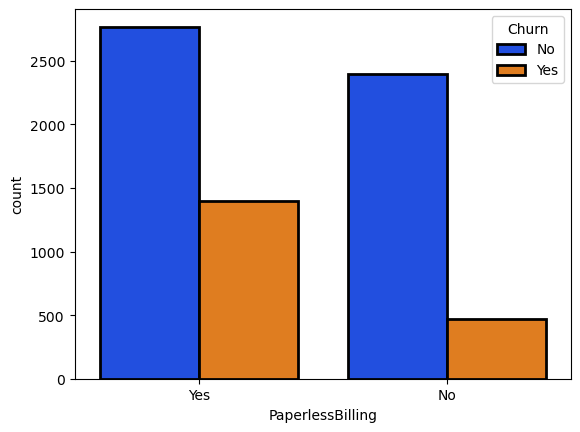

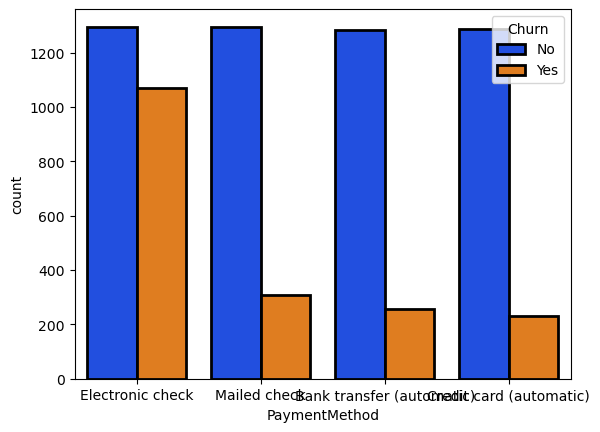

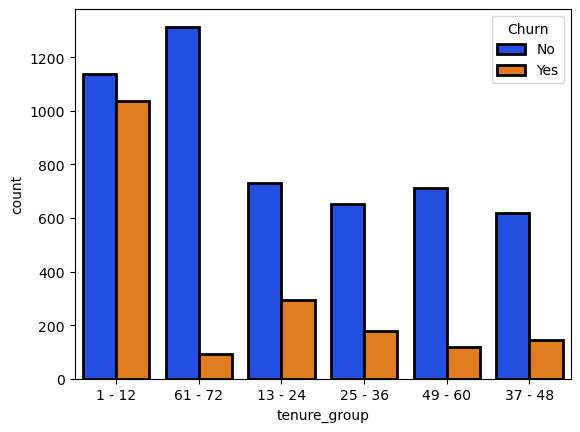

In [109]:
# Iterate over each predictor variable (column) in the telco_data DataFrame,
# excluding 'Churn', 'TotalCharges', and 'MonthlyCharges'.
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    # Create a new figure for each predictor variable.
    plt.figure(i)

    # Create a count plot (bar plot) using seaborn's countplot function.
    # This plot will display the distribution of each predictor variable.
    # The 'x' parameter specifies the predictor variable to plot.
    # The 'hue' parameter adds color differentiation based on the 'Churn' variable,
    # which indicates whether a customer has churned or not.
    sns.countplot(data=telco_data, x=predictor, hue='Churn', palette='bright', dodge=True, 
                  order=telco_data[predictor].value_counts().index, edgecolor=(0,0,0), linewidth=2)

    # Add labels to the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels, title='Churn', loc='upper right')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0


In [110]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [111]:
telco_data.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

### One-Hot Encoding Explanation:

One-hot encoding is a method used to convert categorical variables into a numerical format suitable for machine learning algorithms. Here's how it works:

- **Identification of Categorical Variables**: Identify which variables in the dataset are categorical, representing categories or groups.

- **Creation of Dummy Variables**: Create binary dummy variables for each category in the original variable.

- **Assigning Values**: Assign a value of 1 to the dummy variable corresponding to the category an observation belongs to, and 0 to others.

- **Independence of Variables**: Each dummy variable is independent of others, ensuring no interdependencies.

- **Handling of N Categories**: Create N-1 dummy variables for a categorical variable with N categories to avoid multicollinearity.

One-hot encoding enables categorical variables to be used in machine learning models that require numerical input.


     ***OR you can use Dummy trap method***

     ### Dummy Variable Trap

The dummy variable trap is a situation in regression analysis where variables are highly correlated to each other due to the inclusion of dummy variables for all categories of a categorical variable. This can lead to issues such as multicollinearity, where one predictor variable can be linearly predicted from the others with a high degree of accuracy.

#### Scenario
- **Multicollinearity Issue**: Including dummy variables for all categories of a categorical variable can result in multicollinearity.
- **Trap Scenario**: This trap occurs when multicollinearity affects the interpretation of coefficients and the validity of the regression model.
- **Solution**: To avoid the trap, one dummy variable should be dropped from the regression equation, typically one less than the total number of categories.

#### Example
- If a categorical variable has \(n\) categories, only \(n-1\) dummy variables should be included in the model.
- Dropping one dummy variable eliminates multicollinearity without losing any information.


### One-Hot Encoding vs. Dummy Variable Trap

#### One-Hot Encoding
- **Explanation**: One-hot encoding converts categorical variables into binary format, where each category is represented by a binary vector with only one element being 1 (hot) and the rest 0 (cold).
- **Example**: Consider a categorical variable "City" with three categories: New York, London, and Paris. After one-hot encoding:
  - New York: [1, 0, 0]
  - London: [0, 1, 0]
  - Paris: [0, 0, 1]
- **Pros**:
  - Preserves all information without assumptions about category order.
  - Compatible with most machine learning algorithms.
- **Cons**:
  - Can lead to high-dimensional data if there are many categories.
  - May introduce multicollinearity in regression models if all columns are used.

#### Dummy Variable Trap
- **Explanation**: The dummy variable trap occurs when all dummy variables are included in a regression model, leading to multicollinearity issues.
- **Example**: Using the same "City" example, if we include dummy variables for all three cities (City_NewYork, City_London, City_Paris) in a regression model, it creates perfect multicollinearity. For instance:
  - City_NewYork = 1 - (City_London + City_Paris)
- **Pros**:
  - Raises awareness of multicollinearity issues in regression models.
  - Provides a straightforward solution by dropping one dummy variable to avoid multicollinearity.
- **Cons**:
  - Requires manual intervention to avoid the trap, potentially leading to errors if overlooked.
  - Loss of information if the wrong variable is dropped.

#### Difference
- **Key Difference**: One-hot encoding creates binary columns for each category, while the dummy variable trap occurs when all dummy variables are included in the model, leading to multicollinearity.
- **Solution**: One-hot encoding does not inherently address the dummy variable trap; manual intervention, such as dropping one dummy variable, is necessary to avoid the trap in regression models.



In [118]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [119]:
print(telco_data_dummies.columns.tolist())

['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit c

**9.** Relationship between Monthly Charges and Total Charges


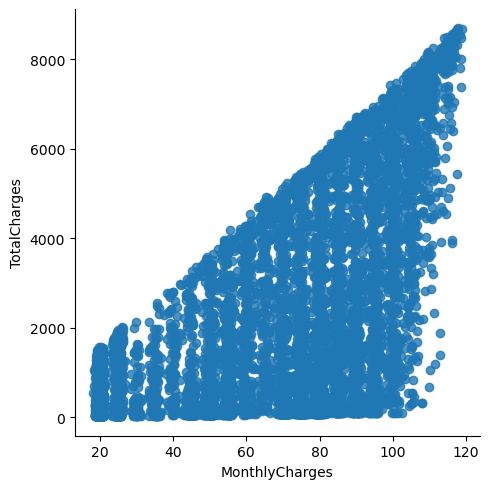

In [120]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


Total Charges increase as Monthly Charges increase - as expected.


**10.** Churn by Monthly Charges and Total Charges


C:\Users\USER\AppData\Local\Temp\ipykernel_75424\722082952.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_75424\722082952.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

Text(0.5, 1.0, 'Monthly charges by churn')

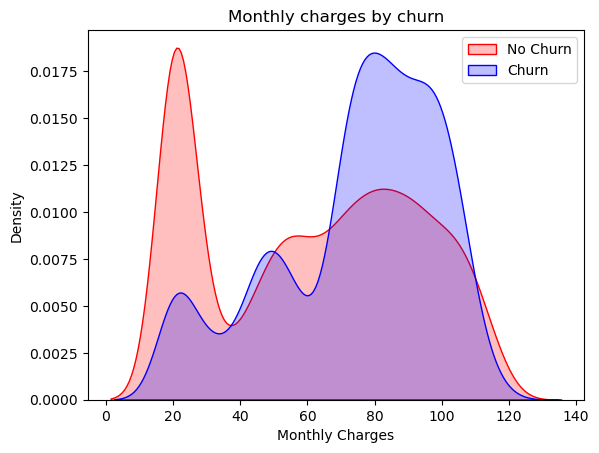

In [121]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges are high


C:\Users\USER\AppData\Local\Temp\ipykernel_75424\4019118049.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_75424\4019118049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

Text(0.5, 1.0, 'Total charges by churn')

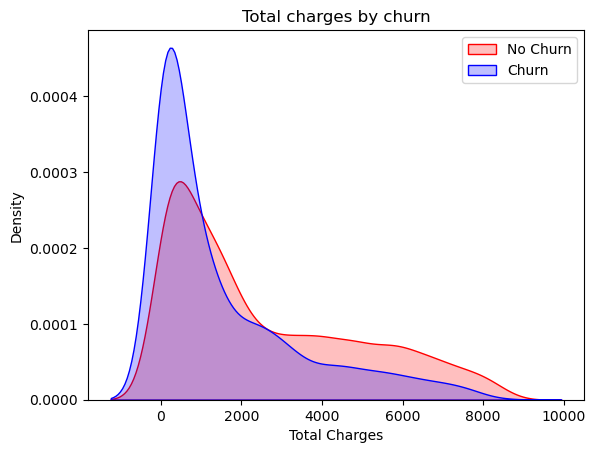

In [122]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight:** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.



**11. Build a corelation of all predictors with 'Churn'**


<Axes: >

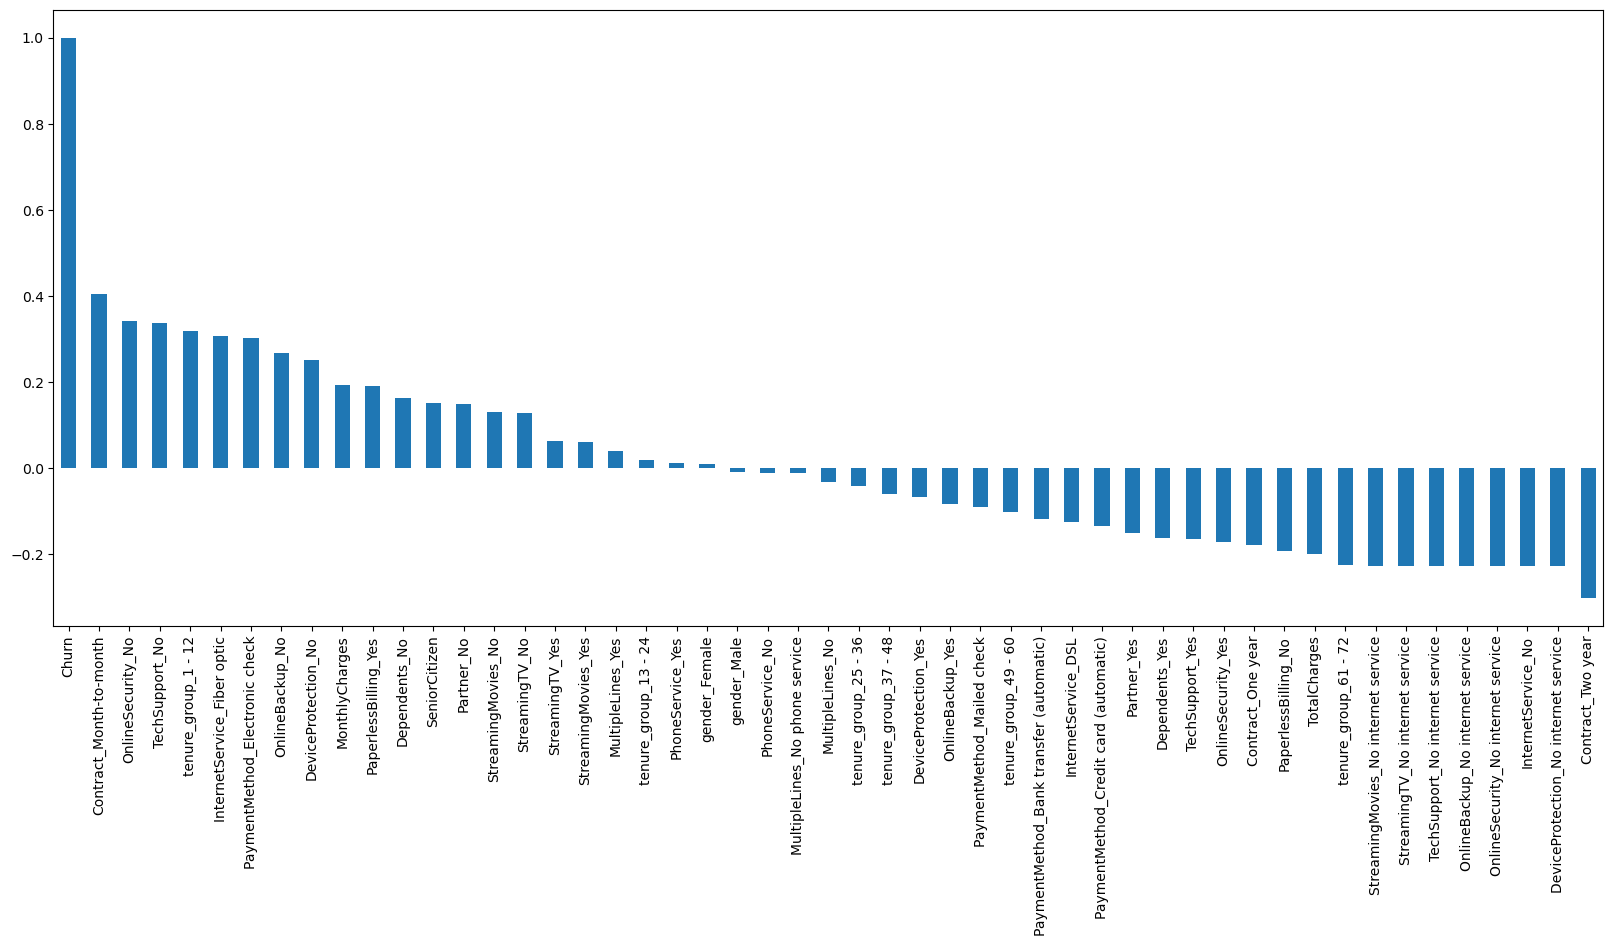

In [123]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

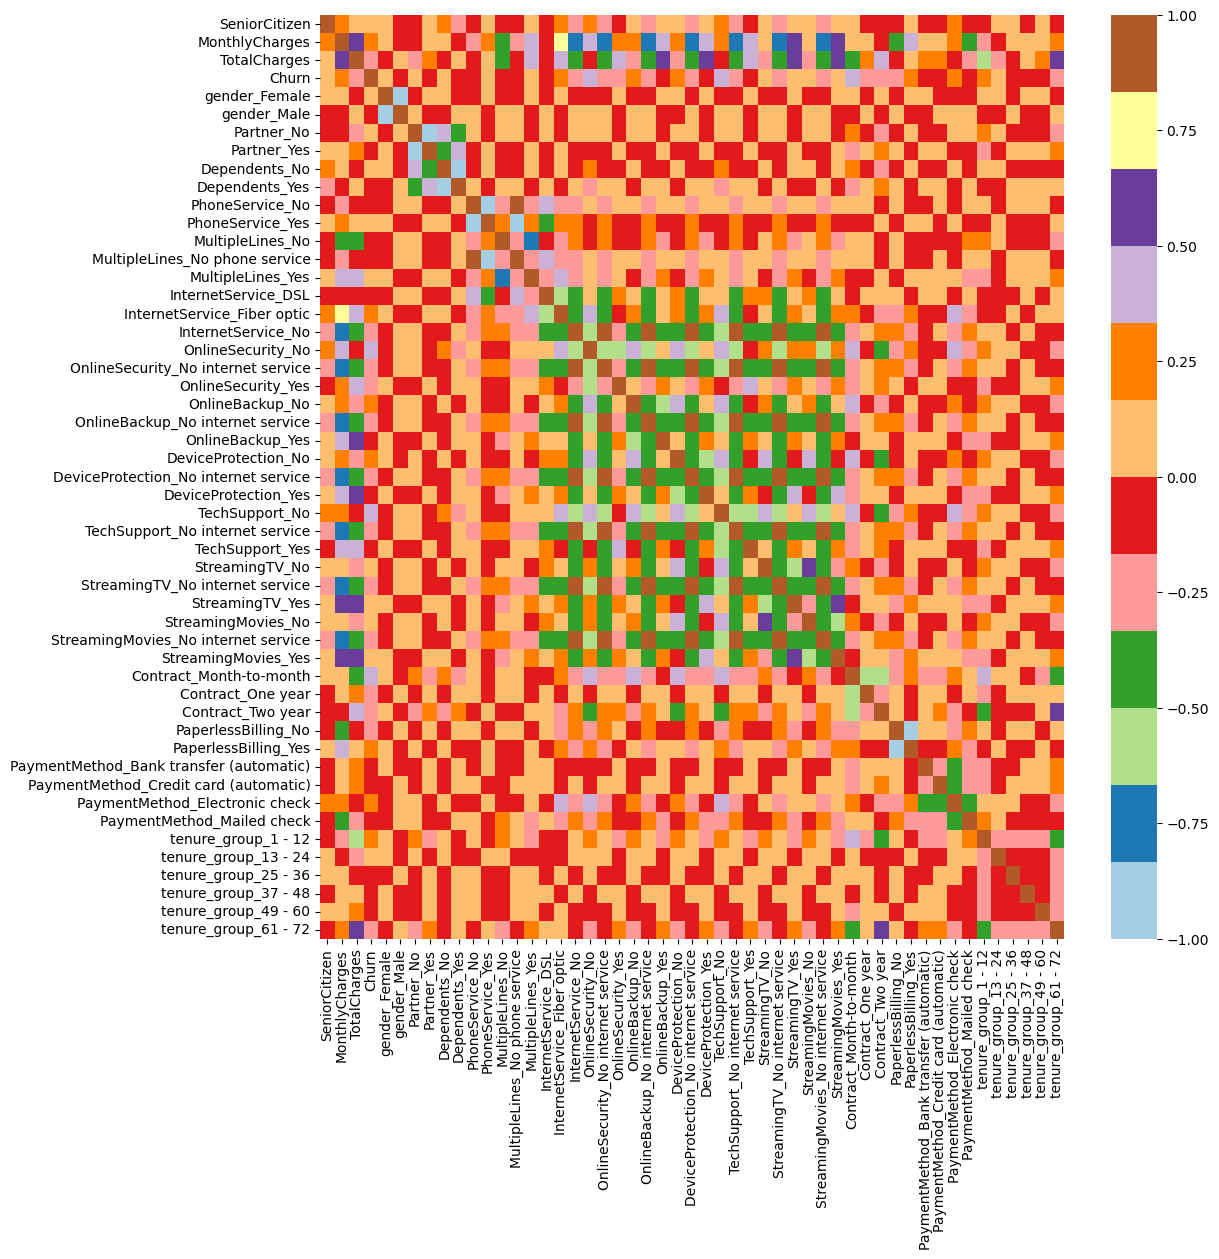

In [124]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

### Bivariate Analysis


In [125]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [126]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

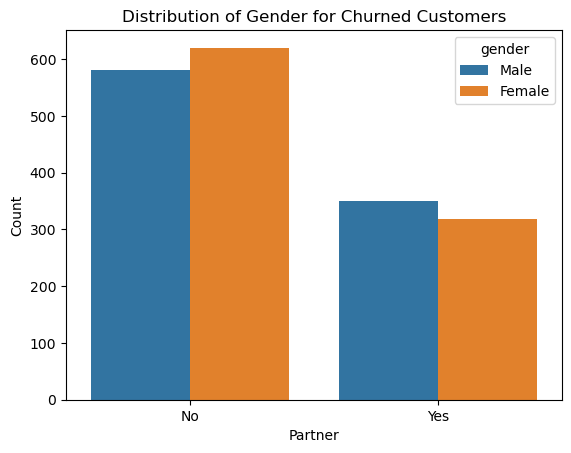

In [127]:
# Set the y-axis scale to linear
sns.countplot(data=new_df1_target1, x='Partner', hue='gender')
plt.title('Distribution of Gender for Churned Customers')
plt.ylabel('Count')
plt.show()


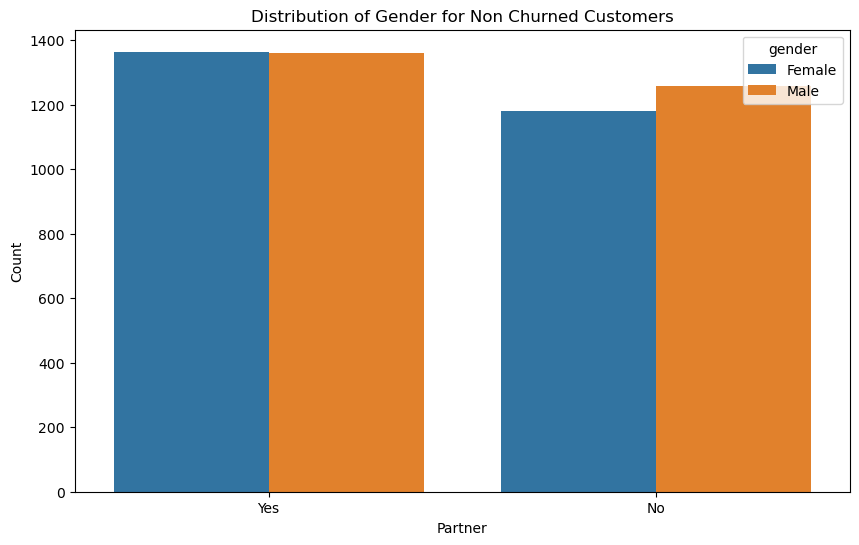

In [128]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the countplot
sns.countplot(data=new_df1_target0, x='Partner', hue='gender')

# Add title and labels
plt.title('Distribution of Gender for Non Churned Customers')
plt.ylabel('Count')

# Show the plot
plt.show()




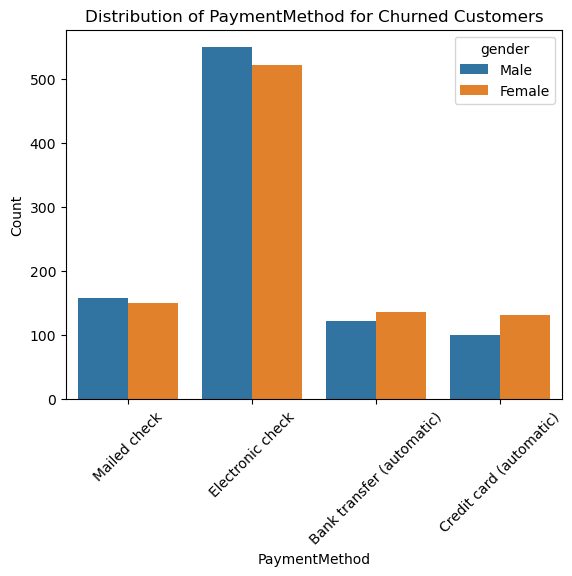

In [129]:
# Set the y-axis scale to linear
sns.countplot(data=new_df1_target1, x='PaymentMethod', hue='gender')
plt.title('Distribution of PaymentMethod for Churned Customers')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


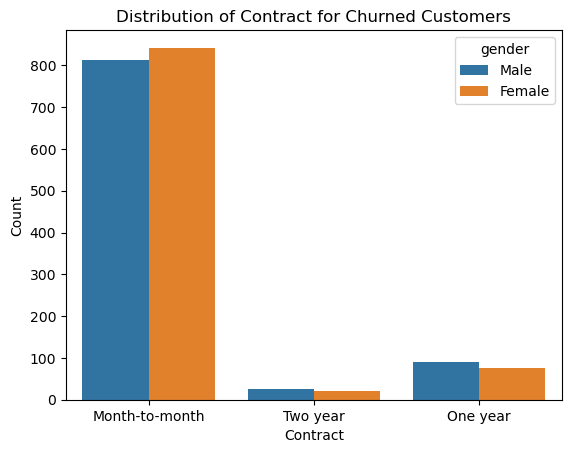

In [130]:
# Set the y-axis scale to linear
sns.countplot(data=new_df1_target1, x='Contract', hue='gender')
plt.title('Distribution of Contract for Churned Customers')
plt.ylabel('Count')
plt.show()


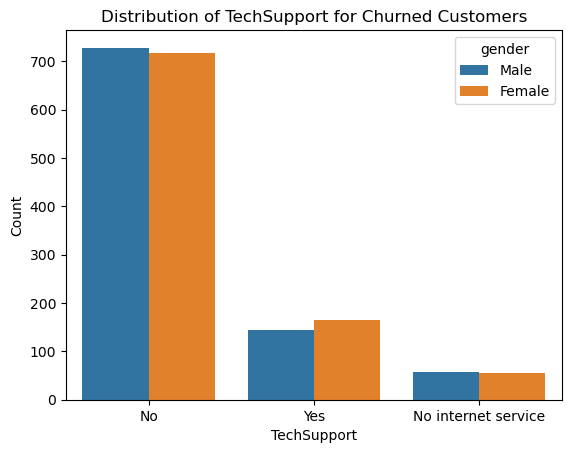

In [131]:
# Set the y-axis scale to linear
sns.countplot(data=new_df1_target1, x='TechSupport', hue='gender')
plt.title('Distribution of TechSupport for Churned Customers')
plt.ylabel('Count')
plt.show()


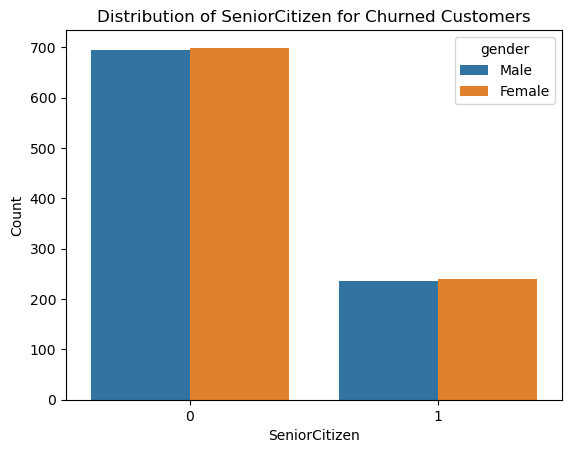

In [132]:
# Set the y-axis scale to linear
sns.countplot(data=new_df1_target1, x='SeniorCitizen', hue='gender')
plt.title('Distribution of SeniorCitizen for Churned Customers')
plt.ylabel('Count')
plt.show()


# CONCLUSION
These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners
   



In [133]:
telco_data_dummies.to_csv('tel_churn.csv')


In [134]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


In [135]:
df= pd.read_csv('tel_churn.csv')

In [136]:
df.head(5)

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [137]:
df=df.drop('Unnamed: 0', axis=1)

In [46]:
df.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [138]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [139]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

# Train Test Split

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


# Decision Tree Classifier

In [143]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [144]:
model_dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [145]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [146]:
model_dt.score(x_test,y_test)


0.7882018479033405

In [147]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1025
           1       0.63      0.53      0.58       382

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [151]:
print(confusion_matrix(y_test, y_pred))

[[906 119]
 [179 203]]


In [152]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [153]:
from imblearn.combine import SMOTEENN

In [156]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)


In [157]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.2)


In [158]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [167]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict=model_dt_smote.predict(xr_test)
model_score_r=model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test,yr_predict))

0.9406276505513147
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       517
           1       0.94      0.95      0.95       662

    accuracy                           0.94      1179
   macro avg       0.94      0.94      0.94      1179
weighted avg       0.94      0.94      0.94      1179



In [169]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[478  39]
 [ 31 631]]


Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

# Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)
model_rf.score(x_test,y_test)


0.7960199004975125

In [171]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1025
           1       0.69      0.45      0.55       382

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407



In [173]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [174]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)


In [175]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [176]:
model_rf_smote.fit(xr_train1,yr_train1)
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)


In [177]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9436379163108455
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       531
           1       0.94      0.96      0.95       640

    accuracy                           0.94      1171
   macro avg       0.94      0.94      0.94      1171
weighted avg       0.94      0.94      0.94      1171



In [178]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))


[[491  40]
 [ 26 614]]


**With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.**


We can now further go ahead and create multiple classifiers to see how the model performance is.

# Performing PCA


In [180]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [181]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [182]:
model.fit(xr_train_pca,yr_train1)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [183]:
yr_predict_pca = model.predict(xr_test_pca)


In [184]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7455166524338173
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       531
           1       0.74      0.82      0.78       640

    accuracy                           0.75      1171
   macro avg       0.75      0.74      0.74      1171
weighted avg       0.75      0.75      0.74      1171



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)


# Pickling the model
Pickling a model in Python means saving it to a file so you can use it later without needing to train it again.

In [185]:
import pickle
filename = 'model.sav'
pickle.dump(model_rf_smote, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r1 = load_model.score(xr_test1, yr_test1)
model_score_r1


0.9436379163108455

Our final model i.e. ***RF Classifier with SMOTEENN***, is now ready and dumped in **model.sav**, which we will use and prepare API's so that we can access our model from UI.